In [1]:
pip install tensorflow

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.0
    Uninstalling protobuf-4.25.0:
      Successfully uninstalled protobuf-4.25.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\TILAK\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\TILAK\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [51]:
import tensorflow as tf
import keras

In [4]:
print(tensorflow.__version__)

2.15.0


In [5]:
print(keras.__version__)

2.15.0


In [6]:
import pandas as pd

In [29]:
df = pd.read_csv("wine.csv")

In [30]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [31]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['quality']=encoder.fit_transform(df[["quality"]])

c:\Users\TILAK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [40]:
x = df.iloc[:,:-1]
y = df["quality"]

In [41]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [48]:
x_train , x_valid ,y_train,y_valid = train_test_split(x_train,y_train,test_size = 0.2)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)
x_train.shape

(1023, 11)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input layer with 11 features
model.add(Dense(32, input_shape=(11,), activation='relu'))  # You can adjust the number of neurons (e.g., 64) based on your needs

# First hidden layer
model.add(Dense(16, activation='relu'))

# Second hidden layer
model.add(Dense(8, activation='relu'))

# Output layer for binary classification (1 neuron with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                384       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
epochs = 30
history = model.fit(x_train,y_train,epochs = epochs,validation_data=(x_valid,y_valid),batch_size=70)

Epoch 1/30
15/15 [==============================] - 1s 20ms/step - loss: 0.6648 - accuracy: 0.5660 - val_loss: 0.6499 - val_accuracy: 0.5977
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6329 - accuracy: 0.6432 - val_loss: 0.6241 - val_accuracy: 0.6406
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 0.6045 - accuracy: 0.6804 - val_loss: 0.5972 - val_accuracy: 0.6797
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 0.5792 - accuracy: 0.6931 - val_loss: 0.5763 - val_accuracy: 0.7109
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 0.5594 - accuracy: 0.7028 - val_loss: 0.5576 - val_accuracy: 0.7148
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7224 - val_loss: 0.5509 - val_accuracy: 0.7266
Epoch 7/30
15/15 [==============================] - 0s 6ms/step - loss: 0.5346 - accuracy: 0.7263 - val_loss: 0.5419 - val_accuracy: 0.7227
Epoch 8/30
15/15 [=

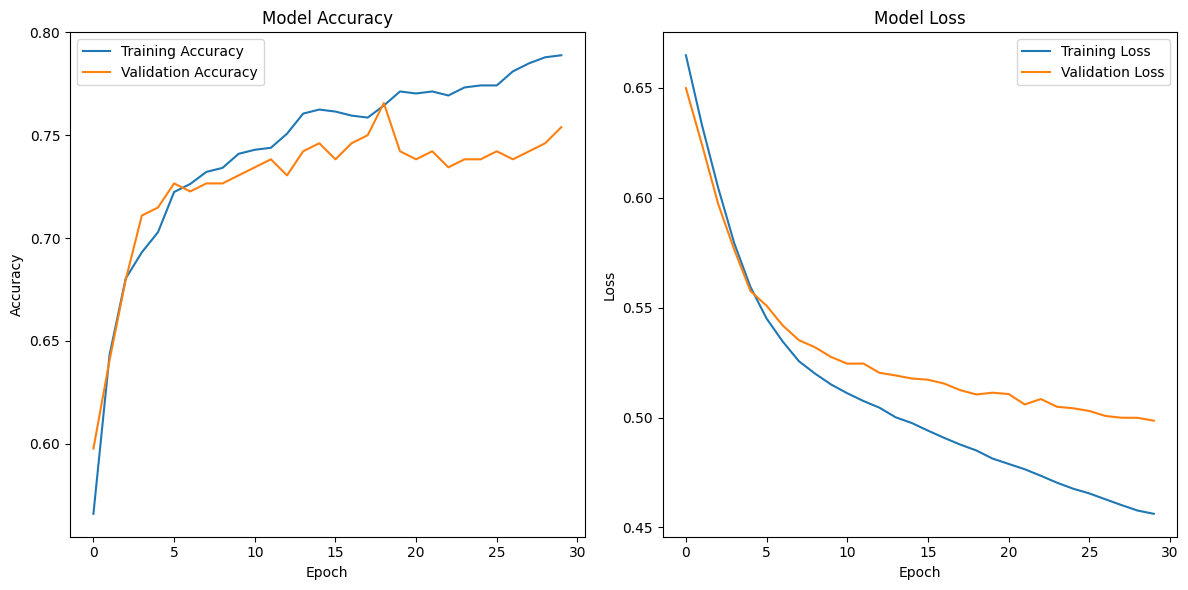

In [112]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [113]:
model

In [114]:
# Assuming 'model' is your trained Keras model

# Get the weights and biases for each layer
for layer in model.layers:
    print(f"\nLayer: {layer.name}")
    print(f"Weights: {layer.get_weights()}")
    print(f"Biases: {layer.get_weights()}")



Layer: dense_12
Weights: [array([[ 0.23496021,  0.2797032 , -0.18739606,  0.2912936 , -0.24387711,
        -0.14957121,  0.0393009 , -0.13803631, -0.31068197,  0.02573082,
        -0.09965914, -0.23728007,  0.2232166 ,  0.26131564, -0.29535344,
         0.4385652 ,  0.19005898, -0.11975358, -0.3006877 , -0.45623955,
        -0.10445445, -0.31415725, -0.18671815, -0.05183971, -0.04969942,
        -0.25958762, -0.31759548, -0.21050559,  0.01707881,  0.26961282,
        -0.3633629 ,  0.14926116],
       [-0.09882727,  0.08061647, -0.33173835, -0.19723181,  0.39045274,
        -0.18341023,  0.29364944,  0.31994665,  0.20775741,  0.24579732,
         0.4094192 , -0.04459167,  0.21627128, -0.4140624 , -0.26513416,
         0.00483552, -0.41368467, -0.20652068,  0.06408667,  0.32978192,
        -0.09701499, -0.22327983,  0.34290674, -0.1912726 , -0.18109684,
         0.27987513,  0.31486043, -0.10467608,  0.22890334, -0.21401837,
        -0.00511307,  0.28272513],
       [ 0.30741265,  0.381

In [117]:
y_pred = model(x_test)

In [120]:

evaluation_result = model.evaluate(x_test, y_test)
print("\nEvaluation Result:")
print(f"Test Loss: {evaluation_result[0]}")
print(f"Test Accuracy: {evaluation_result[1]}")


10/10 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7844

Evaluation Result:
Test Loss: 0.5016195774078369
Test Accuracy: 0.784375011920929
